- **Purpose:** Explore the chapter 9 on negative binomial and zero-inflated models
- **Date:** August 02, 2025

# 1. Libraries and data

In [3]:
# Libraries
install.packages("pscl")
install.packages("performance")
install.packages("AER")
library(tidyverse)
library(pscl)
library(MASS)
library(AER)
library(performance)
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘datawizard’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Classes and Methods for R originally developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University (2002-2015),
by and under the direction of Simon Jackman.
hurdle and zeroinfl functions 

In [6]:
# NMES dataset
data("NMES1988")
nmes <- NMES1988

# 2. EDA

In [7]:
# Structure of the dataset
str(NMES1988)

'data.frame':	4406 obs. of  19 variables:
 $ visits   : int  5 1 13 16 3 17 9 3 1 0 ...
 $ nvisits  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ovisits  : int  0 2 0 5 0 0 0 0 0 0 ...
 $ novisits : int  0 0 0 0 0 0 0 0 0 0 ...
 $ emergency: int  0 2 3 1 0 0 0 0 0 0 ...
 $ hospital : int  1 0 3 1 0 0 0 0 0 0 ...
 $ health   : Factor w/ 3 levels "poor","average",..: 2 2 1 1 2 1 2 2 2 2 ...
  ..- attr(*, "contrasts")= num [1:3, 1:2] 1 0 0 0 0 1
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:3] "poor" "average" "excellent"
  .. .. ..$ : chr [1:2] "poor" "excellent"
 $ chronic  : int  2 2 4 2 2 5 0 0 0 0 ...
 $ adl      : Factor w/ 2 levels "normal","limited": 1 1 2 2 2 2 1 1 1 1 ...
 $ region   : Factor w/ 4 levels "northeast","midwest",..: 4 4 4 4 4 4 2 2 2 2 ...
  ..- attr(*, "contrasts")= num [1:4, 1:3] 1 0 0 0 0 1 0 0 0 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:4] "northeast" "midwest" "west" "other"
  .. .. ..$ : chr [1:3] "northeast" "midwest" "west"
 $ age

In [8]:
# Glimpse into the dataframe
glimpse(nmes)

Rows: 4,406
Columns: 19
$ visits    <int> 5, 1, 13, 16, 3, 17, 9, 3, 1, 0, 0, 44, 2, 1, 19, 19, 0, 3, …
$ nvisits   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 9, 0, 0, …
$ ovisits   <int> 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, …
$ novisits  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, …
$ emergency <int> 0, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ hospital  <int> 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, …
$ health    <fct> average, average, poor, poor, average, poor, average, averag…
$ chronic   <int> 2, 2, 4, 2, 2, 5, 0, 0, 0, 0, 1, 5, 1, 1, 1, 0, 1, 2, 3, 4, …
$ adl       <fct> normal, normal, limited, limited, limited, limited, normal, …
$ region    <fct> other, other, other, other, other, other, midwest, midwest, …
$ age       <dbl> 6.9, 7.4, 6.6, 7.6, 7.9, 6.6, 7.5, 8.7, 7.3, 7.8, 6.6, 6.9, …
$ afam      <fct> yes, no, yes, no, no, no, no, no, no, no, no, no, no, no, no…
$ gender    <fct

In [9]:
# Summary
summary(nmes)

     visits          nvisits           ovisits            novisits       
 Min.   : 0.000   Min.   :  0.000   Min.   :  0.0000   Min.   :  0.0000  
 1st Qu.: 1.000   1st Qu.:  0.000   1st Qu.:  0.0000   1st Qu.:  0.0000  
 Median : 4.000   Median :  0.000   Median :  0.0000   Median :  0.0000  
 Mean   : 5.774   Mean   :  1.618   Mean   :  0.7508   Mean   :  0.5361  
 3rd Qu.: 8.000   3rd Qu.:  1.000   3rd Qu.:  0.0000   3rd Qu.:  0.0000  
 Max.   :89.000   Max.   :104.000   Max.   :141.0000   Max.   :155.0000  
   emergency          hospital           health        chronic     
 Min.   : 0.0000   Min.   :0.000   poor     : 554   Min.   :0.000  
 1st Qu.: 0.0000   1st Qu.:0.000   average  :3509   1st Qu.:1.000  
 Median : 0.0000   Median :0.000   excellent: 343   Median :1.000  
 Mean   : 0.2635   Mean   :0.296                    Mean   :1.542  
 3rd Qu.: 0.0000   3rd Qu.:0.000                    3rd Qu.:2.000  
 Max.   :12.0000   Max.   :8.000                    Max.   :8.000  
      

In [10]:
# NA values
sum(is.na(nmes))

[1] 0

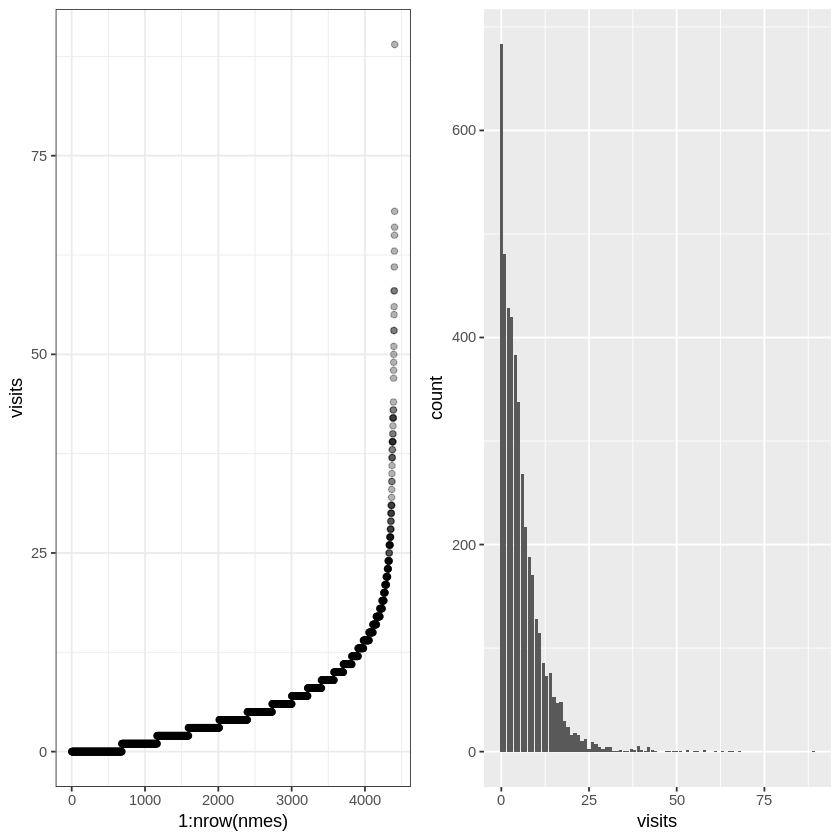

In [13]:
# Visualize the visits
library(cowplot)
p1 <- nmes |>
  arrange(visits) |>
  ggplot() +
  geom_point(aes(1:nrow(nmes), visits), alpha = 0.3) +
  theme_bw()

p2 <- nmes |>
  ggplot() +
  geom_bar(aes(visits))

plot_grid(p1, p2, ncol = 2)

log can be taken to reduce the variability during visualization (not shown here)

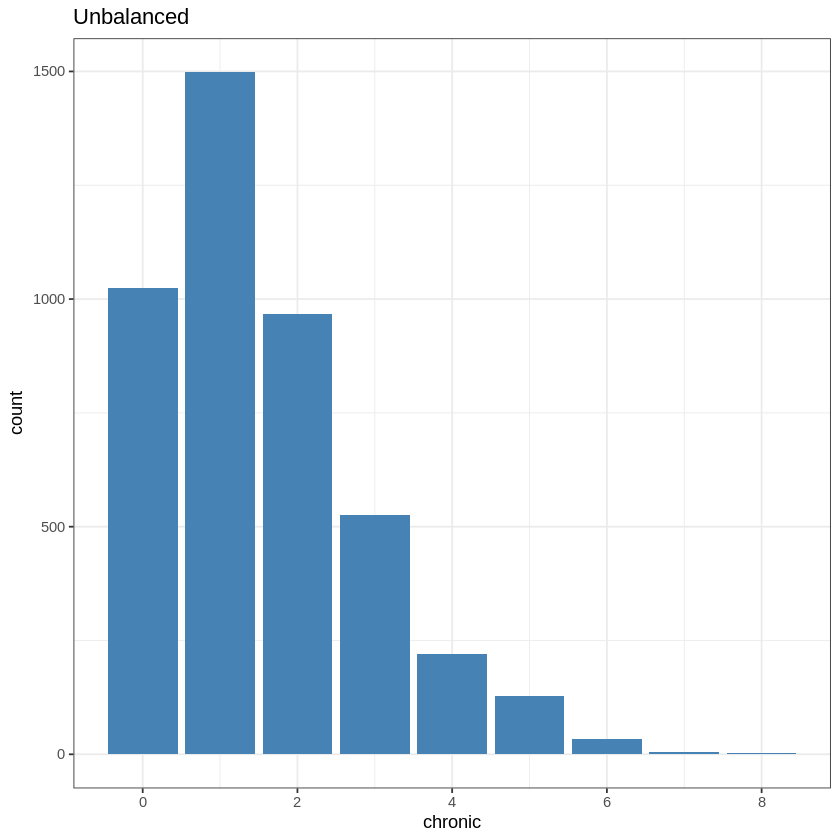

In [21]:
# Visualize the counts for chronic diseases
p1 <- nmes |>
  ggplot() +
  geom_bar(aes(chronic), fill = "steelblue") +
  labs(title = "Unbalanced") +
  theme_bw()
p1

Low support from values >= 4

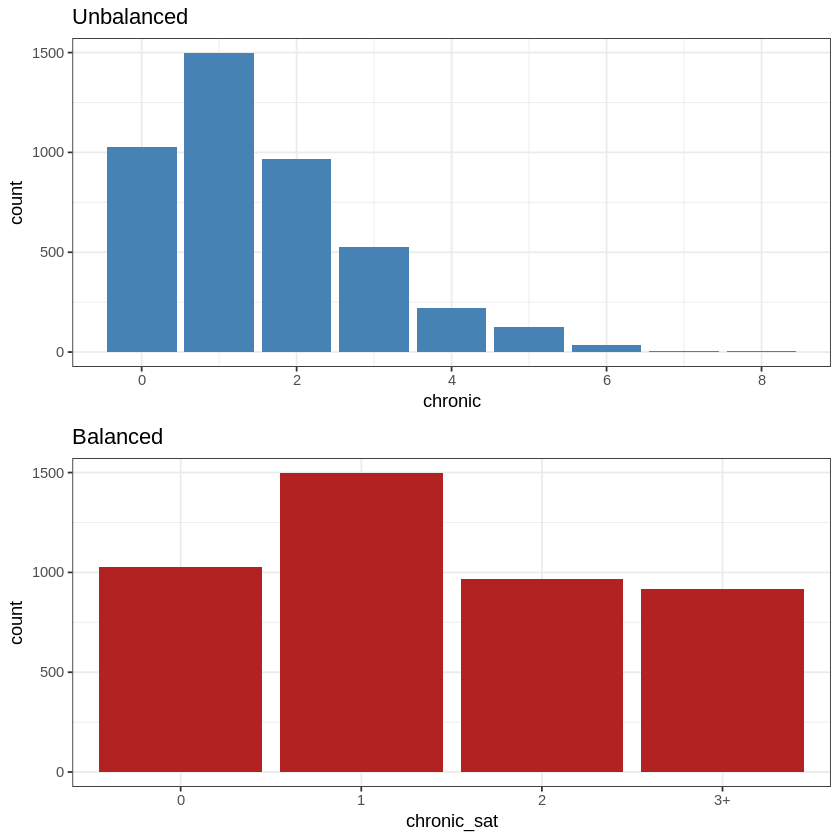

In [23]:
# Function to saturate
sat <- function(x, sat_lim){
  x[x > sat_lim] <- sat_lim # saturate above 3
  lev <- as.character(0: sat_lim) # define the levels
  lev[length(lev)] <- paste0(lev[length(lev)], "+") # rename the last level to indicate the pooling
  x <- as.factor(x) # convert the
  levels(x) <- lev
  return(x)
}

# visualize
p2 <- nmes |>
  mutate(chronic_sat = sat(chronic, 3)) |>
  ggplot() +
  geom_bar(aes(chronic_sat), fill = "firebrick") +
  labs(title = "Balanced") +
  theme_bw()

plot_grid(p1, p2, nrow = 2)

Two transformations -
  

1.   Saturation to **balance** the classes
2.   Log transformation of visits to **reduce the high variability**  



In [24]:
# Add two columns
nmes <- nmes |>
  mutate(
  chronic_sat = sat(chronic, 3),
  log_visits = log(visits + 0.5) # adding a pseudocount of 0.5
  )

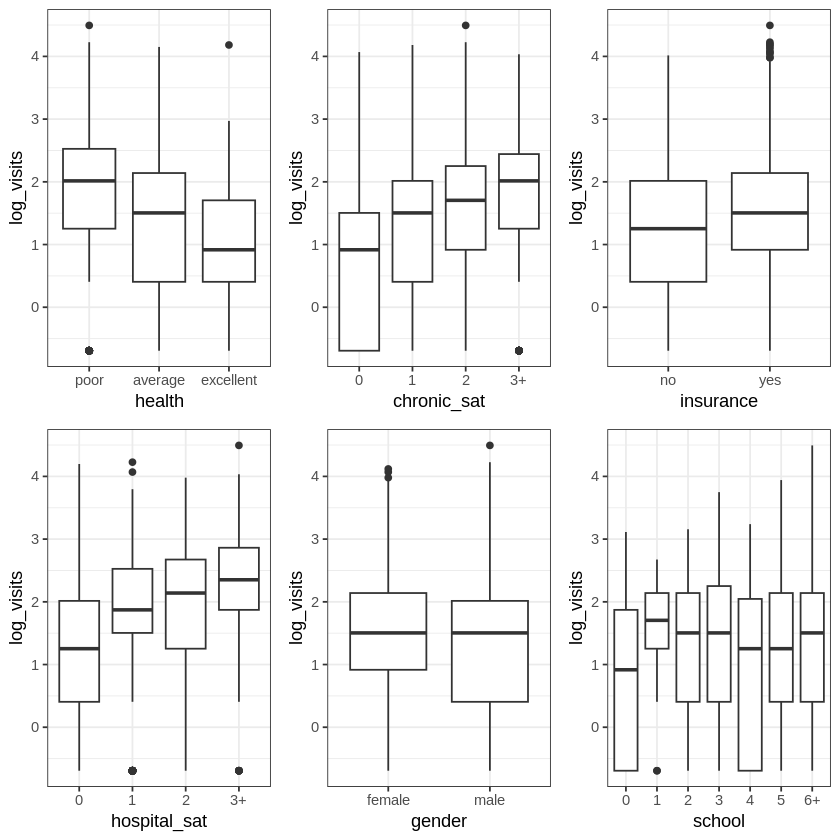

In [30]:
# Plot log_visits against a bunch of potential predictors
plots <- list()

plots$health <- nmes |>
  ggplot(aes(health, log_visits)) +
  geom_boxplot() +
  theme_bw()

plots$chronic <- nmes |>
  ggplot(aes(chronic_sat, log_visits)) +
  geom_boxplot() +
  theme_bw()

plots$insurance <- nmes |>
  ggplot(aes(insurance, log_visits)) +
  geom_boxplot() +
  theme_bw()

plots$hospital <- nmes |>
  mutate(hospital_sat = sat(hospital, 3)) |>
  ggplot(aes(hospital_sat, log_visits)) +
  geom_boxplot() +
  theme_bw()

plots$gender <- nmes |>
  ggplot(aes(gender, log_visits)) +
  geom_boxplot() +
  theme_bw()

plots$school <- nmes |>
  mutate(school = sat(school, 6)) |>
  ggplot(aes(school, log_visits)) +
  geom_boxplot() +
  theme_bw()

do.call(plot_grid, plots)

# 3. Modeling without zero inflation

In [31]:
# GLM Poisson
form <- visits ~ hospital + health + chronic_sat + gender + school + insurance # formula to fit

mod_pois <- glm(
  formula = form,
  family = poisson(link = "log"),
  data = nmes
)

summary(mod_pois)


Call:
glm(formula = form, family = poisson(link = "log"), data = nmes)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.848055   0.027418  30.930  < 2e-16 ***
hospital         0.171588   0.005950  28.841  < 2e-16 ***
healthpoor       0.277053   0.017401  15.922  < 2e-16 ***
healthexcellent -0.312714   0.030443 -10.272  < 2e-16 ***
chronic_sat1     0.361870   0.020591  17.574  < 2e-16 ***
chronic_sat2     0.580241   0.021405  27.108  < 2e-16 ***
chronic_sat3+    0.694679   0.021736  31.960  < 2e-16 ***
gendermale      -0.104541   0.012963  -8.065 7.33e-16 ***
school           0.025902   0.001842  14.062  < 2e-16 ***
insuranceyes     0.191394   0.016902  11.323  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 26943  on 4405  degrees of freedom
Residual deviance: 22928  on 4396  degrees of freedom
AIC: 35723

Number of Fisher Scoring itera

In [32]:
# Negative binomial mode
mod_nb <- glm.nb(
  formula = form,
  data = nmes
)

summary(mod_nb)


Call:
glm.nb(formula = form, data = nmes, init.theta = 1.218804554, 
    link = log)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.792055   0.059558  13.299  < 2e-16 ***
hospital         0.220185   0.020042  10.986  < 2e-16 ***
healthpoor       0.318920   0.047833   6.667 2.60e-11 ***
healthexcellent -0.317113   0.061183  -5.183 2.18e-07 ***
chronic_sat1     0.372721   0.042733   8.722  < 2e-16 ***
chronic_sat2     0.575107   0.047135  12.201  < 2e-16 ***
chronic_sat3+    0.721231   0.049283  14.635  < 2e-16 ***
gendermale      -0.118742   0.031166  -3.810 0.000139 ***
school           0.027295   0.004381   6.230 4.67e-10 ***
insuranceyes     0.207695   0.039357   5.277 1.31e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.2188) family taken to be 1)

    Null deviance: 5782.5  on 4405  degrees of freedom
Residual deviance: 5044.7  on 4396  degrees of freedom
AIC: 243

# 4. Zero-inflated model

In [34]:
# Check if there is zero inflation - poisson
check_zeroinflation(mod_pois)

Model is underfitting zeros (probable zero-inflation).



# Check for zero-inflation

   Observed zeros: 683
  Predicted zeros: 60
            Ratio: 0.09


In [36]:
# Zero-inflated poisson model
mod_zip <- zeroinfl(formula = form, data = nmes)
summary(mod_zip)


Call:
zeroinfl(formula = form, data = nmes)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-4.5758 -1.1488 -0.4766  0.5484 24.6115 

Count model coefficients (poisson with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.307611   0.028121  46.499  < 2e-16 ***
hospital         0.162911   0.006033  27.004  < 2e-16 ***
healthpoor       0.278539   0.017354  16.051  < 2e-16 ***
healthexcellent -0.283549   0.031288  -9.063  < 2e-16 ***
chronic_sat1     0.212773   0.020937  10.163  < 2e-16 ***
chronic_sat2     0.361709   0.021714  16.658  < 2e-16 ***
chronic_sat3+    0.440948   0.021973  20.067  < 2e-16 ***
gendermale      -0.057361   0.013071  -4.388 1.14e-05 ***
school           0.019133   0.001873  10.215  < 2e-16 ***
insuranceyes     0.077189   0.017174   4.494 6.98e-06 ***

Zero-inflation model coefficients (binomial with logit link):
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.04724    0.15010   0.315 

In [37]:
# Zero-inflated NB
mod_zinb <- zeroinfl(formula = form, dist = "negbin", data = nmes)
summary(mod_zinb)


Call:
zeroinfl(formula = form, data = nmes, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.1938 -0.7112 -0.2775  0.3293 17.1983 

Count model coefficients (negbin with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.096144   0.063810  17.178  < 2e-16 ***
hospital         0.202671   0.020602   9.837  < 2e-16 ***
healthpoor       0.303138   0.046057   6.582 4.65e-11 ***
healthexcellent -0.304768   0.063342  -4.812 1.50e-06 ***
chronic_sat1     0.260039   0.045197   5.753 8.75e-09 ***
chronic_sat2     0.419531   0.048339   8.679  < 2e-16 ***
chronic_sat3+    0.542364   0.049509  10.955  < 2e-16 ***
gendermale      -0.072537   0.031212  -2.324   0.0201 *  
school           0.022117   0.004415   5.010 5.44e-07 ***
insuranceyes     0.106747   0.042311   2.523   0.0116 *  
Log(theta)       0.401063   0.036208  11.077  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
                Estimate St

In [38]:
# Setting them as two different parts
zinb_2model <- zeroinfl(
  formula = visits ~ hospital + health + chronic_sat + gender + school + insurance | # count
    hospital + chronic_sat + gender + school + insurance, # zero
  dist = "negbin",
  data = nmes
)
summary(zinb_2model)


Call:
zeroinfl(formula = visits ~ hospital + health + chronic_sat + gender + 
    school + insurance | hospital + chronic_sat + gender + school + insurance, 
    data = nmes, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.1930 -0.7129 -0.2774  0.3325 17.2308 

Count model coefficients (negbin with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.095975   0.063712  17.202  < 2e-16 ***
hospital         0.203030   0.020520   9.894  < 2e-16 ***
healthpoor       0.299896   0.045025   6.661 2.73e-11 ***
healthexcellent -0.307842   0.060352  -5.101 3.38e-07 ***
chronic_sat1     0.261129   0.045084   5.792 6.95e-09 ***
chronic_sat2     0.420119   0.048342   8.691  < 2e-16 ***
chronic_sat3+    0.542827   0.049521  10.962  < 2e-16 ***
gendermale      -0.073013   0.031222  -2.339   0.0194 *  
school           0.022174   0.004399   5.041 4.64e-07 ***
insuranceyes     0.105967   0.042156   2.514   0.0119 *  
Log(theta)       

# 5. Hurdle

In [39]:
# Fit the hurdle model
mod_hurdle <- hurdle(formula = form, data = nmes)
summary(mod_hurdle)


Call:
hurdle(formula = form, data = nmes)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-4.5965 -1.1507 -0.4768  0.5482 24.5851 

Count model coefficients (truncated poisson with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.308658   0.028104  46.565  < 2e-16 ***
hospital         0.162841   0.006034  26.988  < 2e-16 ***
healthpoor       0.278497   0.017355  16.047  < 2e-16 ***
healthexcellent -0.282804   0.031274  -9.043  < 2e-16 ***
chronic_sat1     0.212190   0.020935  10.136  < 2e-16 ***
chronic_sat2     0.361344   0.021708  16.646  < 2e-16 ***
chronic_sat3+    0.440479   0.021973  20.046  < 2e-16 ***
gendermale      -0.057295   0.013071  -4.383 1.17e-05 ***
school           0.019050   0.001871  10.180  < 2e-16 ***
insuranceyes     0.077519   0.017166   4.516 6.31e-06 ***
Zero hurdle model coefficients (binomial with logit link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.0981863  0.1468254 

# 6. Comparison of models

In [40]:
# AIC
AIC(mod_pois, mod_zip, mod_zinb, zinb_2model, mod_hurdle)

,df,AIC
,<dbl>,<dbl>
mod_pois,10,35723.15
mod_zip,20,32254.65
mod_zinb,21,24212.56
zinb_2model,19,24208.69
mod_hurdle,20,32255.57


In [42]:
# LRT between mod_zinb and zinb_2model
lrtest(mod_zinb, zinb_2model)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,-12085.28,NA,NA,NA
2,19,-12085.34,-2,0.1279947,0.9380075


In [45]:
# LRT between ZIP and zinb_2model
lrtest(mod_zip, zinb_2model)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,-16107.32,NA,NA,NA
2,19,-12085.34,-1,8043.96,0


In [46]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] performance_0.15.0 cowplot_1.2.0      AER_1.2-15         survival_3.8-3    
 [5] sandwich_3.1-1     lmtest_0.9-40      zoo_1.8-14         car_3.1-3         
 [9] carData_3.0-